<a href="https://colab.research.google.com/github/Unfeir/DS/blob/main/HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import tensorflow as tf

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Bidirectional, Dense, Embedding, LSTM, SimpleRNN
from keras.utils import pad_sequences
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Домашнє завдання
В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [2]:
max_features = 10000
maxlen = 500
batch_size = 256
epochs=50
validation_split=0.3

In [4]:
(train_data, y_train), (test_data, y_test) = imdb.load_data(num_words=max_features)
train_data.shape, y_train.shape

((25000,), (25000,))

In [10]:
print(len(train_data[55]))
print(train_data[55])
print(len(train_data[5]))
print(train_data[5])

766
[1, 5011, 892, 711, 12, 2774, 38, 2428, 145, 11, 4, 3673, 7, 4292, 13, 377, 95, 4, 20, 385, 46, 5, 4, 5011, 2, 28, 77, 2, 19, 4, 711, 2, 126, 237, 10, 10, 4, 711, 2, 135, 3006, 5011, 562, 6, 87, 189, 787, 5, 2262, 12, 4, 5011, 2, 92, 202, 6, 1543, 44, 4669, 65, 36, 740, 44, 2, 5430, 665, 370, 2445, 14, 9, 6, 22, 36, 6807, 12, 144, 30, 1192, 23, 94, 205, 17, 12, 571, 199, 9686, 26, 2296, 472, 10, 10, 48, 31, 2692, 12, 2855, 17, 35, 1253, 7, 4669, 667, 4, 3537, 9, 849, 6, 2104, 6, 1053, 1434, 6, 201, 7, 2, 1321, 2, 10, 10, 13, 343, 8, 1821, 15, 23, 7392, 2979, 4, 564, 4289, 2820, 2133, 7, 3458, 1349, 2, 3458, 4313, 525, 47, 6, 2577, 17, 35, 7858, 7, 1031, 7131, 279, 59, 16, 2218, 18, 41, 1302, 4400, 7, 2, 4249, 42, 223, 6891, 21, 4, 117, 1336, 7621, 513, 7, 2, 2, 152, 1778, 23, 101, 4911, 11, 41, 2, 2518, 10, 10, 5011, 4, 2, 242, 258, 41, 2, 190, 29, 7, 265, 9, 4, 147, 8839, 5, 1192, 23, 94, 205, 5068, 27, 881, 18, 4, 3537, 19, 94, 2, 7, 2, 5608, 2, 2, 5, 6270, 9580, 43, 152, 759, 56

In [13]:
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

In [14]:
print(len(train_data[55]))
print(len(train_data[5]))
print(train_data[5])

500
500
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    

In [18]:
words = imdb.get_word_index()
reverse_word = dict([(value, key) for (key, value) in words.items()])
decoded = ' '.join([reverse_word.get(i - 3, '') for i in train_data[55]])

print(decoded)

either  either way the film pretty much falls apart br br are the horrors of the overlook hotel real or do they exist only in the mind first as  nightmares suffered by little danny  then as the hallucinations of his father one notes how whenever jack  is seen talking to a ghost he is in fact looking into a mirror one notes how the  frozen    appears to  jack's  convoluted psyche very deep stuff br br but if indeed the  ghosts are purely  of jack  growing insanity then who exactly lets the trapped jack out of the hotel  dead  walk in closet so that he can go on his climactic  wielding rampage br br and can anyone explain with a straight face that black and white photograph    of nicholson as a  party goer that pops up out of left field and onto a hotel ballroom wall during the film's closing seconds are we to seriously conclude that jack  bad   from a some sort of past life experience and if you swallow that since when are  people supposed to be exact physical  their past  br br maybe k

In [30]:
class Model:
    def __init__(self, typ, input_train, y_train, epochs, batch_size, validation_split):
        self.typ = typ

        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc",
                                                     patience=2,
                                                     verbose=1,
                                                     mode="max")

        self.callback_save = ModelCheckpoint("best_1.hdf5",
                                             monitor="val_loss",
                                             save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(typ)
        self.model.add(Dense(1, activation='sigmoid'))

    def compile(self):
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
      return self.model.summary()

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping, self.callback_save])
        return fits

In [40]:
class DeepModel:
    def __init__(self, input_train, y_train, epochs, batch_size, validation_split):

        self.input_train = input_train
        self.y_train = y_train
        self.epochs = epochs
        self.batch_size = batch_size
        self.validation_split = validation_split

        self.callback_early_stopping = EarlyStopping(monitor="val_acc",
                                                     patience=2,
                                                     verbose=1,
                                                     mode="max")

        self.callback_save = ModelCheckpoint("best_1.hdf5",
                                             monitor="val_loss",
                                             save_best_only=True)

        self.model = Sequential()
        self.model.add(Embedding(max_features, 32))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32, return_sequences=True)))
        self.model.add(Dropout(0.2))
        self.model.add(Bidirectional(LSTM(32)))
        self.model.add(Dense(1, activation='sigmoid'))

    def compile(self):
        self.model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
        return self.model

    def summary(self):
      return self.model.summary()

    def fit(self):
        fits = self.model.fit(self.input_train,
                              self.y_train,
                              epochs=self.epochs,
                              batch_size=self.batch_size,
                              validation_split=self.validation_split,
                              callbacks=[self.callback_early_stopping, self.callback_save])
        return fits

In [42]:
mode_simpleRNN = Model(typ=SimpleRNN(32),
             input_train=train_data,
             y_train=y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_split=validation_split)

mode_LSTM = Model(typ=LSTM(32),
             input_train=train_data,
             y_train=y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_split=validation_split)

mode_Bidirectional_LSTM = Model(typ=Bidirectional(LSTM(32)),
             input_train=train_data,
             y_train=y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_split=validation_split)

mode_deep_LSTM = DeepModel(
             input_train=train_data,
             y_train=y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_split=validation_split)

mode_simpleRNN.compile()
mode_LSTM.compile()
mode_Bidirectional_LSTM.compile()
mode_deep_LSTM.compile()


In [38]:
mode_simpleRNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [35]:
mode_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [36]:
mode_Bidirectional_LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [43]:
mode_deep_LSTM.summary()


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 32)          320000    
                                                                 
 bidirectional_10 (Bidirecti  (None, None, 64)         16640     
 onal)                                                           
                                                                 
 dropout_5 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_11 (Bidirecti  (None, None, 64)         24832     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_12 (Bidirecti  (None, None, 64)       

In [44]:
history_simpleRNN = mode_simpleRNN.fit()
history_LSTM = mode_LSTM.fit()
history_Bidirectional_LSTM = mode_Bidirectional_LSTM.fit()
history_deep_LSTM = mode_deep_LSTM.fit()



Epoch 1/50
69/69 [==============================] - 24s 324ms/step - loss: 0.6741 - acc: 0.5711 - val_loss: 0.6043 - val_acc: 0.6949
Epoch 2/50
69/69 [==============================] - 19s 275ms/step - loss: 0.4913 - acc: 0.7759 - val_loss: 0.4258 - val_acc: 0.8183
Epoch 3/50
69/69 [==============================] - 20s 291ms/step - loss: 0.3798 - acc: 0.8397 - val_loss: 0.3905 - val_acc: 0.8341
Epoch 4/50
69/69 [==============================] - 18s 267ms/step - loss: 0.2967 - acc: 0.8817 - val_loss: 0.3773 - val_acc: 0.8344
Epoch 5/50
69/69 [==============================] - 21s 305ms/step - loss: 0.2449 - acc: 0.9072 - val_loss: 0.3688 - val_acc: 0.8503
Epoch 6/50
69/69 [==============================] - 18s 259ms/step - loss: 0.1970 - acc: 0.9262 - val_loss: 0.6169 - val_acc: 0.7612
Epoch 7/50
69/69 [==============================] - 19s 277ms/step - loss: 0.1587 - acc: 0.9422 - val_loss: 0.5350 - val_acc: 0.7577
Epoch 7: early stopping
Epoch 1/50
69/69 [===========================

In [52]:

test_loss, test_acc = mode_simpleRNN.model.evaluate(test_data, y_test)
print(f'mode_simpleRNN: {test_loss=}')
print(f'mode_simpleRNN: {test_acc=}')

test_loss, test_acc = mode_LSTM.model.evaluate(test_data, y_test)
print(f'mode_LSTM: {test_loss=}')
print(f'mode_LSTM: {test_acc=}')

test_loss, test_acc = mode_Bidirectional_LSTM.model.evaluate(test_data, y_test)
print(f'mode_Bidirectional_LSTM: {test_loss=}')
print(f'mode_Bidirectional_LSTM: {test_acc=}')

test_loss, test_acc = mode_deep_LSTM.model.evaluate(test_data, y_test)
print(f'mode_deep_LSTM: {test_loss=}')
print(f'mode_deep_LSTM: {test_acc=}')

782/782 [==============================] - 26s 33ms/step - loss: 0.5324 - acc: 0.7567
mode_simpleRNN: test_loss=0.532355010509491
mode_simpleRNN: test_acc=0.7567200064659119
782/782 [==============================] - 45s 57ms/step - loss: 0.3419 - acc: 0.8695
mode_LSTM: test_loss=0.3418583571910858
mode_LSTM: test_acc=0.8694800138473511
782/782 [==============================] - 71s 91ms/step - loss: 0.3736 - acc: 0.8366
mode_Bidirectional_LSTM: test_loss=0.37363770604133606
mode_Bidirectional_LSTM: test_acc=0.8366400003433228
782/782 [==============================] - 440s 563ms/step - loss: 0.3477 - acc: 0.8573
mode_deep_LSTM: test_loss=0.34768351912498474
mode_deep_LSTM: test_acc=0.8573200106620789


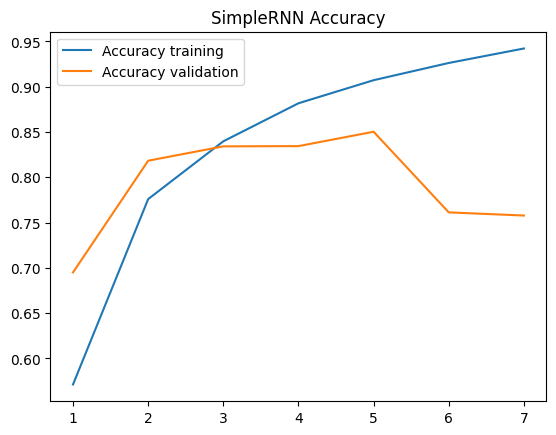

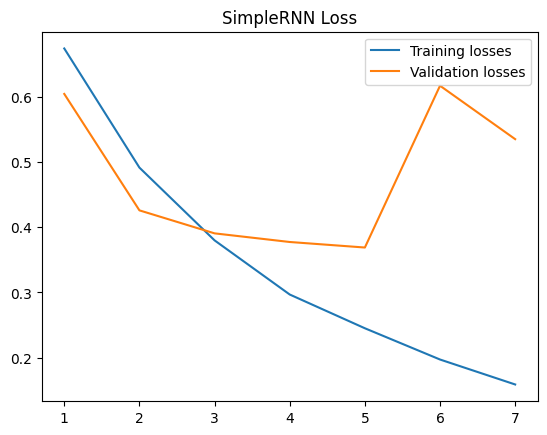

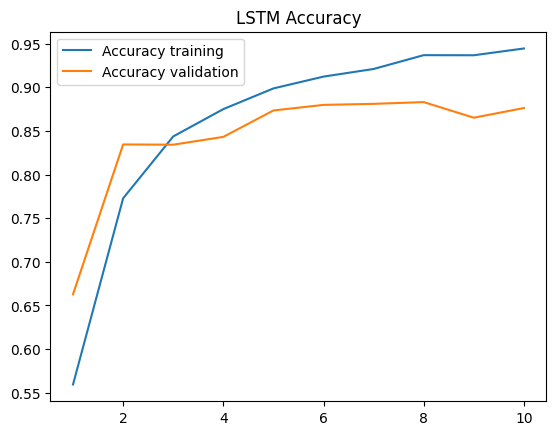

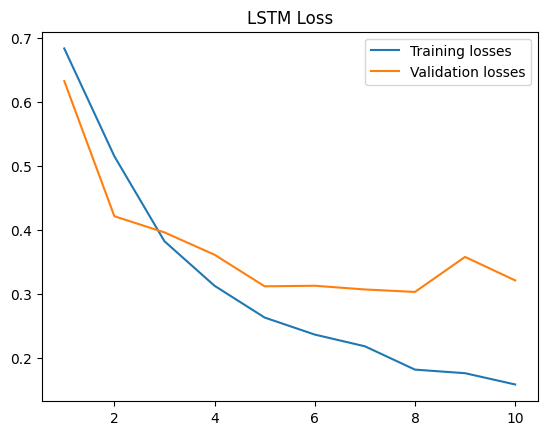

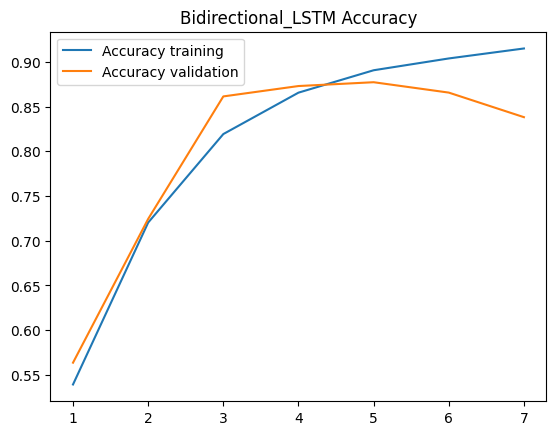

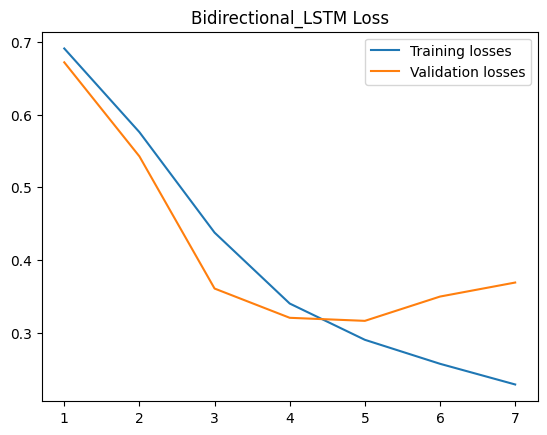

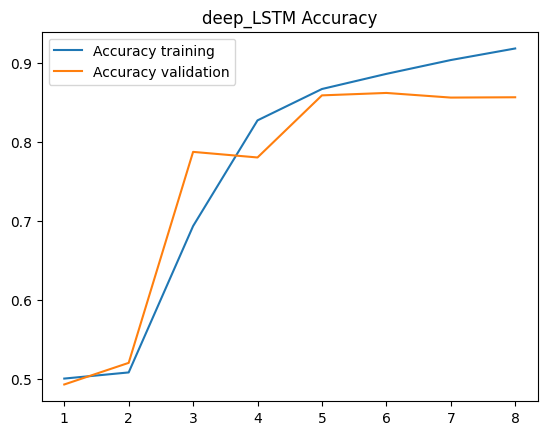

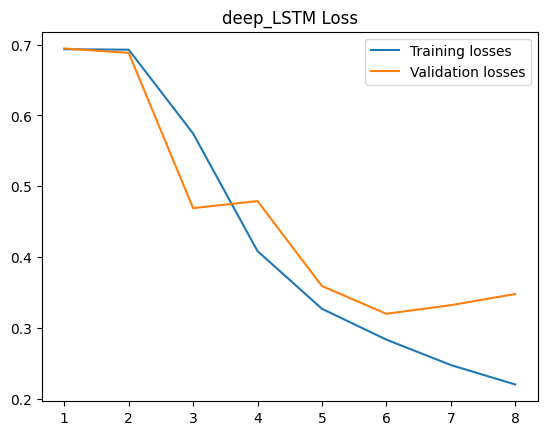

In [47]:
acc = history_simpleRNN.history['acc']
val_acc = history_simpleRNN.history['val_acc']
loss = history_simpleRNN.history['loss']
val_loss = history_simpleRNN.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Accuracy training')
plt.plot(epochs, val_acc, label='Accuracy validation')
plt.title('SimpleRNN Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training losses')
plt.plot(epochs, val_loss, label='Validation losses')
plt.title('SimpleRNN Loss')
plt.legend()

plt.show()

######################################################################

acc = history_LSTM.history['acc']
val_acc = history_LSTM.history['val_acc']
loss = history_LSTM.history['loss']
val_loss = history_LSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Accuracy training')
plt.plot(epochs, val_acc, label='Accuracy validation')
plt.title('LSTM Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training losses')
plt.plot(epochs, val_loss, label='Validation losses')
plt.title('LSTM Loss')
plt.legend()

plt.show()

######################################################################

acc = history_Bidirectional_LSTM.history['acc']
val_acc = history_Bidirectional_LSTM.history['val_acc']
loss = history_Bidirectional_LSTM.history['loss']
val_loss = history_Bidirectional_LSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Accuracy training')
plt.plot(epochs, val_acc, label='Accuracy validation')
plt.title('Bidirectional_LSTM Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training losses')
plt.plot(epochs, val_loss, label='Validation losses')
plt.title('Bidirectional_LSTM Loss')
plt.legend()

plt.show()


######################################################################

acc = history_deep_LSTM.history['acc']
val_acc = history_deep_LSTM.history['val_acc']
loss = history_deep_LSTM.history['loss']
val_loss = history_deep_LSTM.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Accuracy training')
plt.plot(epochs, val_acc, label='Accuracy validation')
plt.title('deep_LSTM Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training losses')
plt.plot(epochs, val_loss, label='Validation losses')
plt.title('deep_LSTM Loss')
plt.legend()

plt.show()


**mode_simpleRNN**: 		 - loss: 0.1587 - acc: 0.9422 - val_loss: 0.5350 - val_acc: 0.7577

**mode_LSTM**:      		 - loss: 0.1578 - acc: 0.9445 - val_loss: 0.3207 - val_acc: 0.8763

**mode_Bidirectional_LSTM**: - loss: 0.2285 - acc: 0.9149 - val_loss: 0.3688 - val_acc: 0.8381

**mode_deep_LSTM**:			 - loss: 0.2204 - acc: 0.9182 - val_loss: 0.3480 - val_acc: 0.8565

simpleRNN перенавчилася

LSTM - показала найкращі резуьтати не дивлячись на простоту моделі.

Двостороння та глибокі моделі показали приблизно такі самі результати як і LSTM хоч і більш скалдні
